In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [15]:
data_dir = '/Users/gbromley/data/CRU/'
temp_file = 'pre/cru_ts4.03.1901.2018.pre.dat.nc'
CRU_TEMP = xr.open_dataset(data_dir+temp_file)
WRF_PRECIP = xr.open_dataset('monthly_precip_cru.nc')


### Random Definitions
ext_e = -92
ext_w = -120
ext_n = 55
ext_s = 38

start_year = '2012-10-01'
end_year = '2013-10-01'

### Study Area
ngp_mask = xr.open_dataset('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/ngp_mask.nc')
ngp_mask = ngp_mask.rename({'__xarray_dataarray_variable__':'ngp'})
mask = ngp_mask['ngp']


### Extract Variables
CRU = CRU_TEMP['pre'].sel(time=slice(start_year,end_year))

#Calculate Total Rain
WRF_PRECIP = WRF_PRECIP['precip']


### Ouput Data
month = ['October','November','December','January','February','March','April','May','June','July','August','September']
lat = CRU.lat
lon = CRU.lon
vals = np.empty(shape=(12,len(lat),len(lon)))
vals[:,:,:] = np.nan
DIFF = xr.DataArray(vals,coords=[month,lat,lon],dims=['month','lat','lon'])
DIFF.name = 'WRF-CRU'
DIFF.attrs['units'] = 'mm'



In [ ]:
CRU.where(mask==1).isel(time=8).plot()

In [ ]:

wrf_test = WRF_PRECIP.isel(XTIME=8) - WRF_PRECIP.isel(XTIME=7)

In [16]:
months = [1,2,3,4,5,6,7,8,9,10,11]
DIFF[0] = (CRU.isel(time=0))/(WRF_PRECIP.isel(XTIME=0))
for month in months:
        DIFF[month] =  (CRU.isel(time=month))/(WRF_PRECIP.isel(XTIME=month) - WRF_PRECIP.isel(XTIME=(month-1)))


In [17]:

CRU_test = CRU.sel(lat=slice(ext_s-5,ext_n+5),lon=slice(ext_w-5,ext_e+5))
#wrf_test = wrf_test.sel(lat=slice(ext_s-5,ext_n+5),lon=slice(ext_w-5,ext_e+5))
DIFF_test = DIFF.sel(lat=slice(ext_s-5,ext_n+5),lon=slice(ext_w-5,ext_e+5))

In [19]:
DIFF_test

<xarray.DataArray 'WRF-CRU' (month: 12, lat: 54, lon: 76)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * month    (month) <U9 'October' 'November' ... 'August' 'September'
  * lat      (lat) float32 33.25 33.75 34.25 34.75 ... 58.25 58.75 59.25 59.75
  * lon      (lon) float32 -124.75 -124.25 -123.75 ... -88.25 -87.75 -87.25
Attributes:
    units:    mm

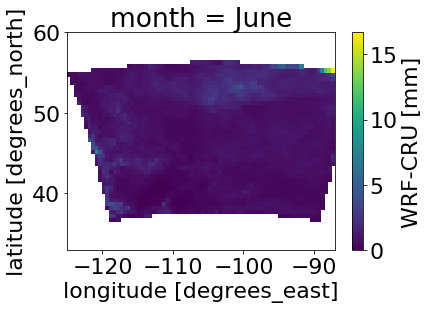

In [21]:
DIFF_test.isel(month=8).plot()

In [8]:
diff_ngp = DIFF_test.where(mask==1)

In [ ]:
CRU_test.isel(time=8).plot()

In [ ]:
wrf_test.plot()

In [5]:
ngp = DIFF.where(mask==1)
test = ngp.stack(z=('lat','lon'))
#
season_values = test.groupby('month').apply(lambda x: x.dropna(dim='z'))

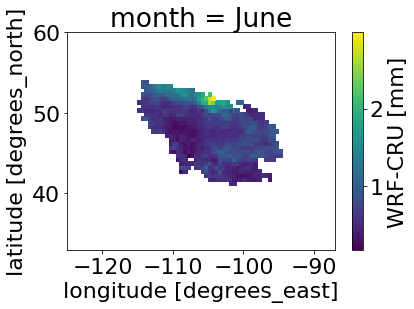

In [12]:
diff_ngp.isel(month=8).plot()

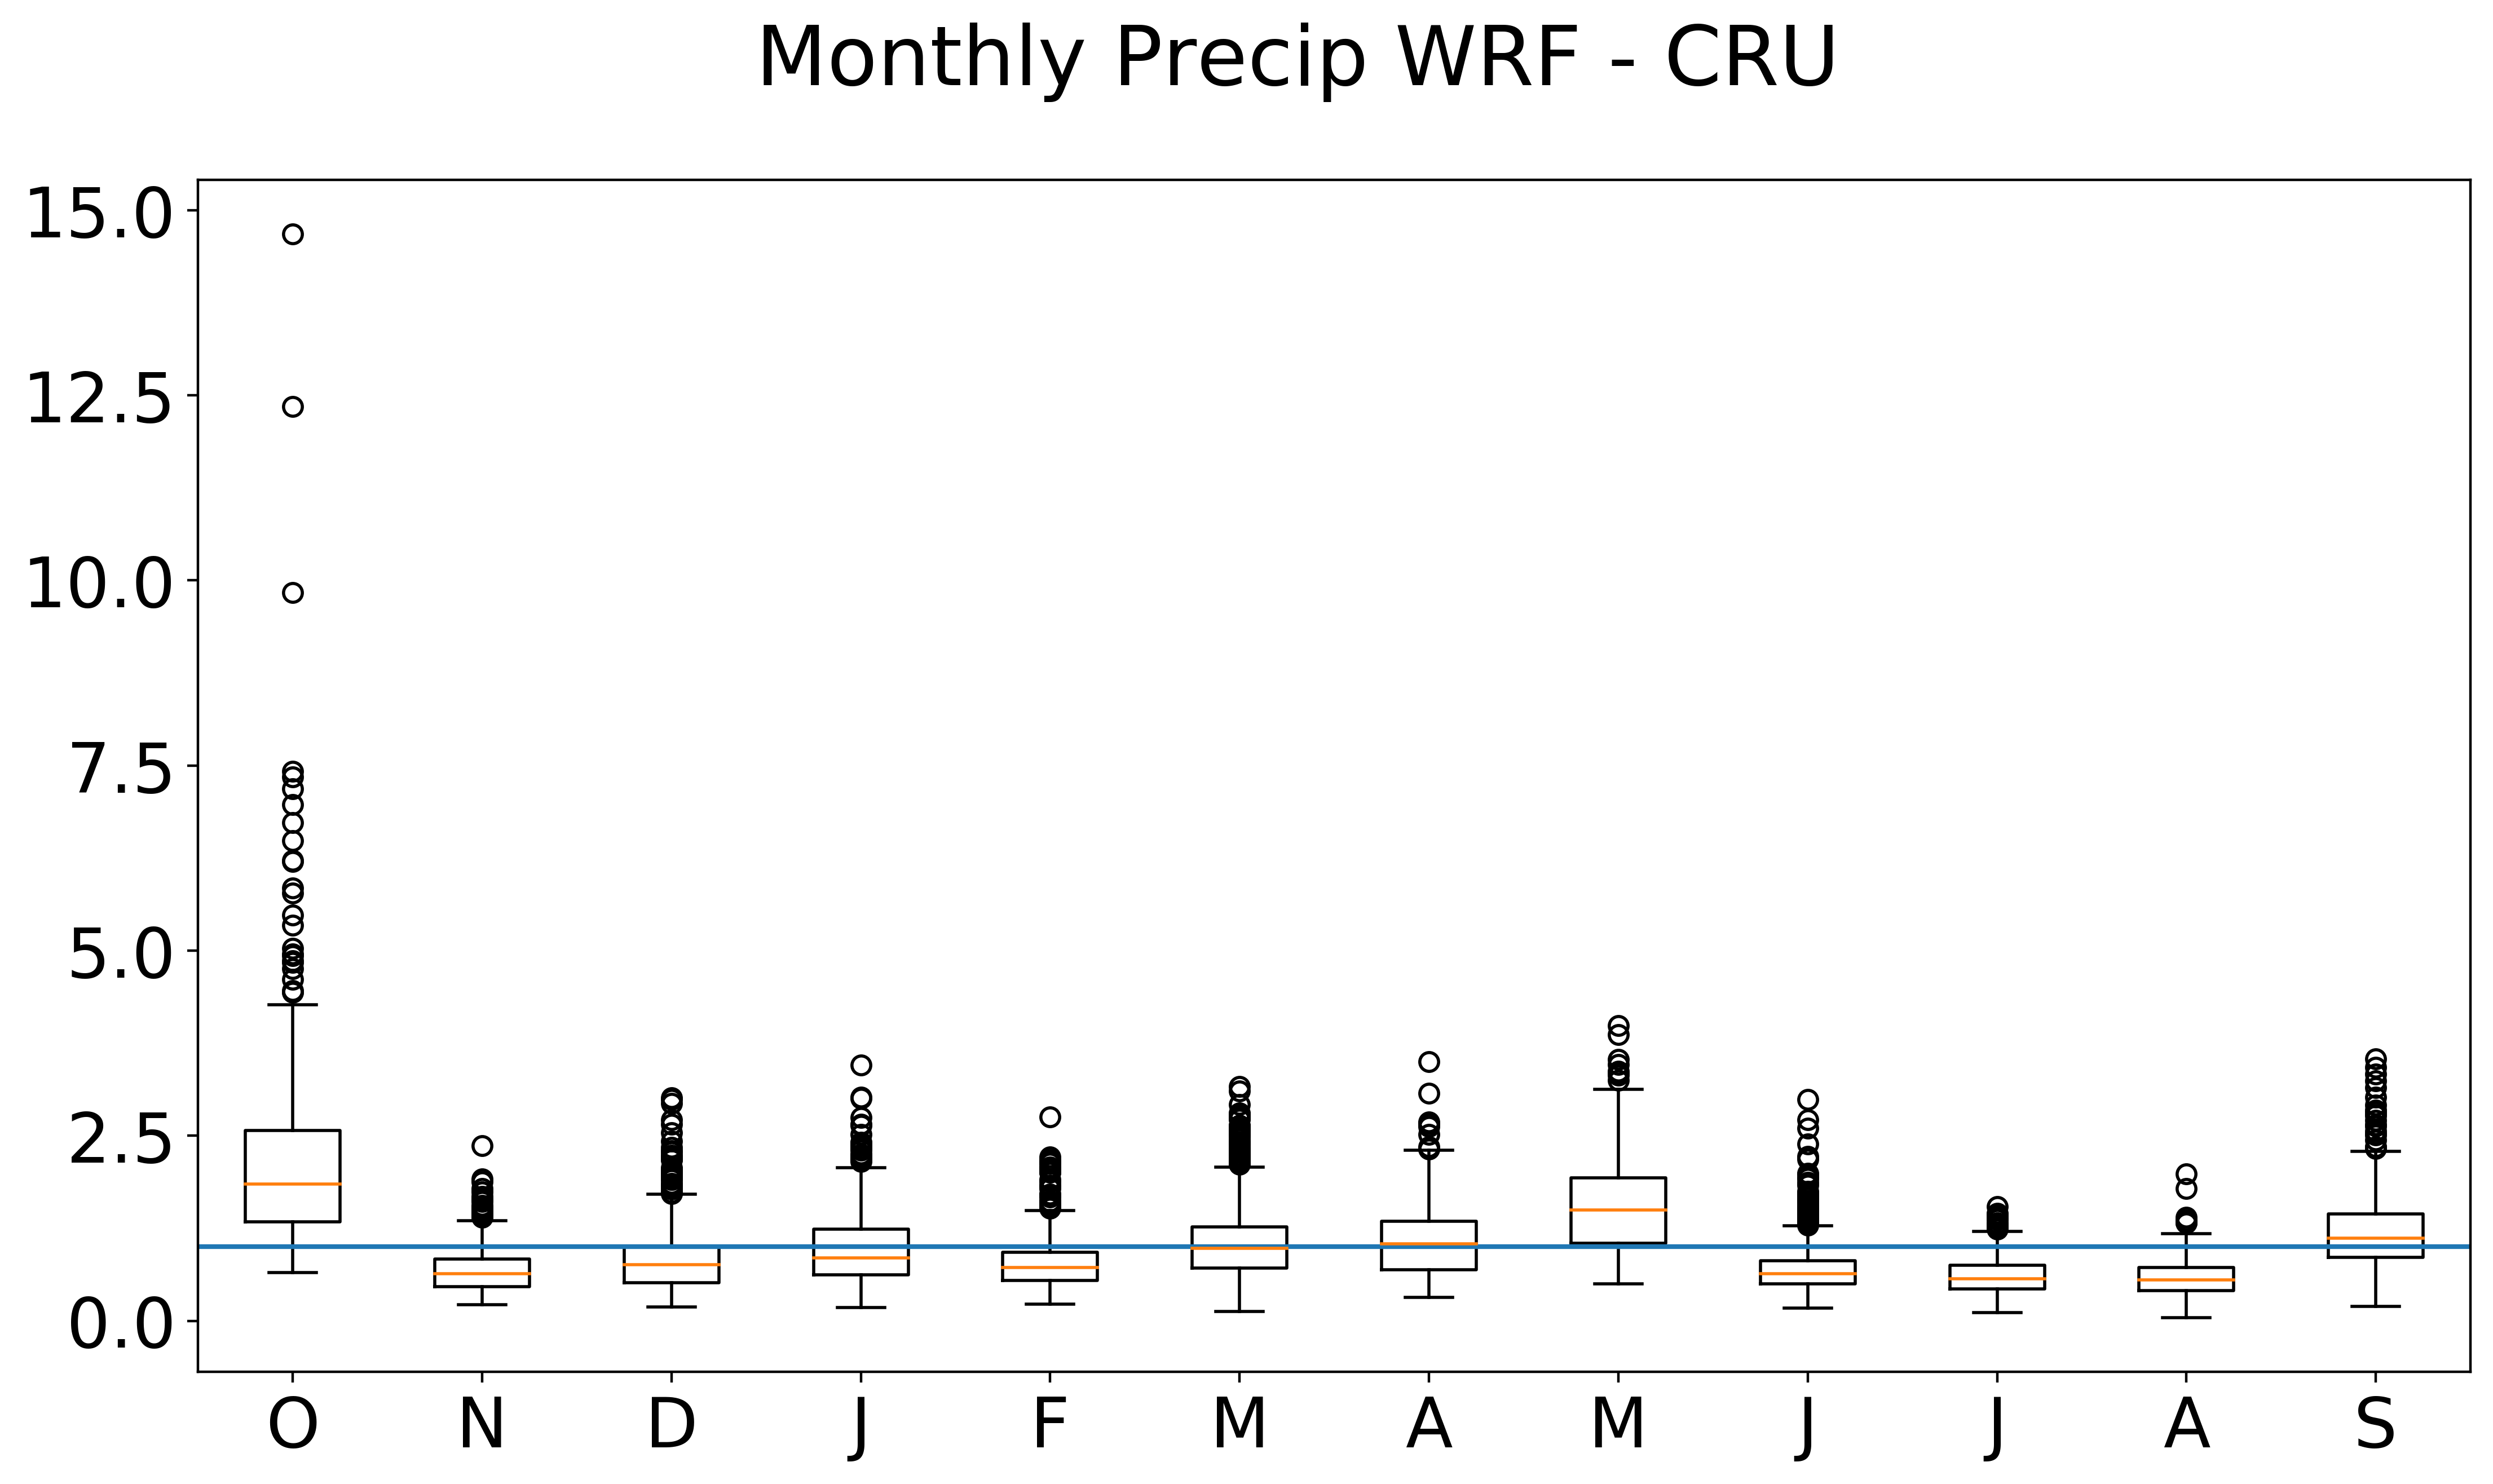

In [14]:
plt.rcParams.update({'font.size': 22})
month = ['O','N','D','J','F','M','A','M','J','J','A','S']
fig, ax = plt.subplots(ncols=1)
fig.set_dpi(400)
fig.set_size_inches((13,7))
fig.suptitle('Monthly Precip WRF - CRU')
pos = np.array(range(len(season_values))) + 1
plt.boxplot(season_values, positions=pos)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12], month)
ax.axhline(1)

#ax.set_ylabel('Precip Difference (mm)')
#plt.savefig('/Users/gbromley/Dropbox/Montana_Climate_Project/NGP Modeling Paper/Figures/WY_2013_CRU-WRF-diff_precip.png',bbox_inches='tight')
